# UTS Praktikum Pembelajaran Mesin
* Nama : Gladys Lady Nathasha
* NIM : 1227050052
* Kelas : B

In [ ]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv('citrus.csv')
print(df.head())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
print(df.describe())

           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


In [ ]:
# Cek missing value
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
# Label untuk name diubah menjadi angka/numerik
df['label'] = df['name'].map({'orange': 0, 'grapefruit': 1})

In [8]:
df = df.drop('name', axis=1)

In [ ]:
# Split antara Fitur dan Label
X = df.drop('label', axis=1)
y = df['label']

In [10]:
print(df.head())

   diameter  weight  red  green  blue  label
0      2.96   86.76  172     85     2      0
1      3.91   88.05  166     78     3      0
2      4.42   95.17  156     81     2      0
3      4.47   95.60  163     81     4      0
4      4.48   95.76  161     72     9      0


In [11]:
# Split Data Training dan Testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Latih Model Naive Bayes

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Akurasi: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1012
           1       0.91      0.93      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



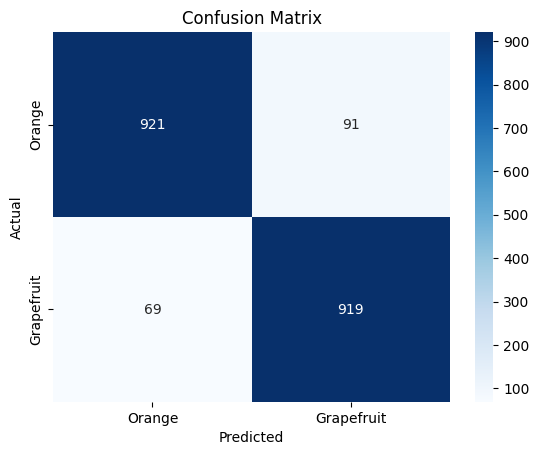

In [13]:
# Prediksi dan Evaluasi Model

y_pred = model.predict(X_test)

# Evaluasi metrik
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Orange', 'Grapefruit'], yticklabels=['Orange', 'Grapefruit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
# Contoh data uji baru: [diameter, weight, red, green, blue]
sample_data = [[11.5, 200.0, 145, 80, 5]]  # Coba input yang mirip grapefruit

# Prediksi
prediction = model.predict(sample_data)

# Tampilkan hasil
if prediction[0] == 0:
    print("Prediksi: Orange")
else:
    print("Prediksi: Grapefruit")

Prediksi: Grapefruit


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
